In [1]:
import numpy as np
import pyclesperanto_prototype as cle

cl.OCLArray([[  1,   1,   1, ..., 544, 544, 544],
       [  1,   1,   1, ..., 544, 544, 544],
       [  1,   1,   1, ..., 544, 544, 544],
       ...,
       [ 13,  13,  13, ..., 543, 543, 543],
       [ 13,  13,  13, ..., 543, 543, 543],
       [ 13,  13,  13, ..., 543, 543, 543]], dtype=uint32)
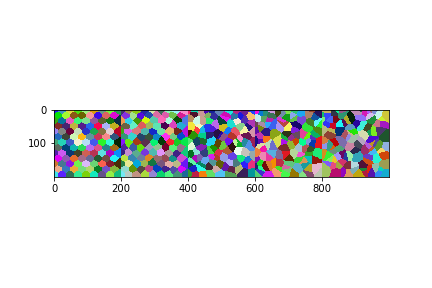

In [2]:
def example_data():
    sigmas = [0, 2, 5, 8, 10]
    result = None
    for sigma in sigmas:
        
        tissue = cle.artificial_tissue_2d(
            random_sigma_x=sigma, 
            random_sigma_y=sigma, 
            width=200, 
            height=200)
        
        if result is None:
            result = tissue
        else:
            result = cle.combine_horizontally(result, tissue)
    
    borders = cle.detect_label_edges(result)
    objects = cle.binary_not(borders)
    result = cle.voronoi_labeling(objects)
    
    return result

labels = example_data()
labels

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
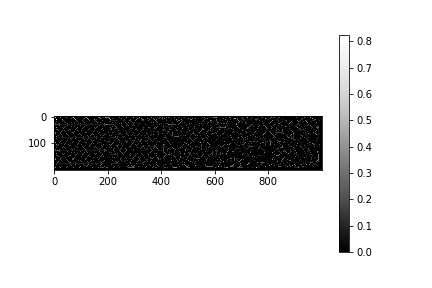
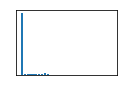

In [3]:
touch_portion_map = cle.draw_touch_portion_mesh_between_touching_labels(labels)
touch_portion_map

cl.OCLArray([[0.32608694, 0.32608694, 0.32608694, ..., 0.07863248, 0.07863248,
        0.07863248],
       [0.32608694, 0.32608694, 0.32608694, ..., 0.07863248, 0.07863248,
        0.07863248],
       [0.32608694, 0.32608694, 0.32608694, ..., 0.07863248, 0.07863248,
        0.07863248],
       ...,
       [0.09375   , 0.09375   , 0.09375   , ..., 0.08888888, 0.08888888,
        0.08888888],
       [0.09375   , 0.09375   , 0.09375   , ..., 0.08888888, 0.08888888,
        0.08888888],
       [0.09375   , 0.09375   , 0.09375   , ..., 0.08888888, 0.08888888,
        0.08888888]], dtype=float32)
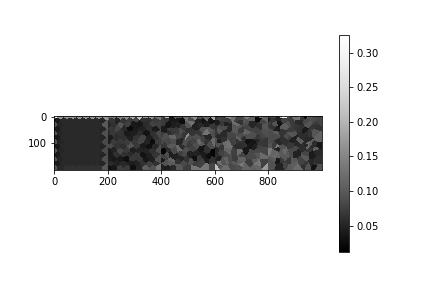
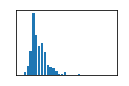

In [4]:
std_touch_portion_map = cle.standard_deviation_touch_portion_map(labels)
std_touch_portion_map

cl.OCLArray([[0.17836885, 0.17836885, 0.17836885, ..., 0.07444469, 0.07444469,
        0.07444469],
       [0.17836885, 0.17836885, 0.17836885, ..., 0.07444469, 0.07444469,
        0.07444469],
       [0.17836885, 0.17836885, 0.17836885, ..., 0.07444469, 0.07444469,
        0.07444469],
       ...,
       [0.06359681, 0.06359681, 0.06359681, ..., 0.06116405, 0.06116405,
        0.06116405],
       [0.06359681, 0.06359681, 0.06359681, ..., 0.06116405, 0.06116405,
        0.06116405],
       [0.06359681, 0.06359681, 0.06359681, ..., 0.06116405, 0.06116405,
        0.06116405]], dtype=float32)
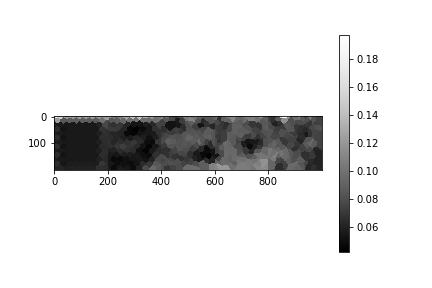
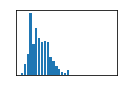

In [5]:
mean_std_touch_portion_map = cle.mean_of_touching_neighbors_map(std_touch_portion_map, labels)
mean_std_touch_portion_map